In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('https://dados.ufrn.br/dataset/8bf1a468-48ff-4f4d-95ee-b17b7a3a5592/resource/6a8e5461-e748-45c6-aac6-432188d88dde/download/docentes.csv', sep=';')

In [22]:
ativos = df[df['vinculo'].str.contains('Ativo')].count() / df.shape[0]
print(f' ativos {ativos} ', ativos * 100)

 ativos siape                    0.857762
nome                     0.857762
sexo                     0.857762
formacao                 0.857762
tipo_jornada_trabalho    0.857762
vinculo                  0.857762
categoria                0.857762
classe_funcional         0.857762
id_unidade_lotacao       0.857762
lotacao                  0.857762
admissao                 0.857762
dtype: float64  siape                    85.776173
nome                     85.776173
sexo                     85.776173
formacao                 85.776173
tipo_jornada_trabalho    85.776173
vinculo                  85.776173
categoria                85.776173
classe_funcional         85.776173
id_unidade_lotacao       85.776173
lotacao                  85.776173
admissao                 85.776173
dtype: float64


In [13]:
df.dtypes

siape                     int64
nome                     object
sexo                     object
formacao                 object
tipo_jornada_trabalho    object
vinculo                  object
categoria                object
classe_funcional         object
id_unidade_lotacao        int64
lotacao                  object
admissao                 object
dtype: object

In [23]:
df.drop('nome', axis=1, inplace=True) # remove e atualiza o df

In [24]:
df.describe(include='object')


,sexo,formacao,tipo_jornada_trabalho,vinculo,categoria,classe_funcional,lotacao,admissao
count,2770,2770,2770,2770,2770,2770,2770,2770
unique,2,6,3,10,7,18,135,1400
top,M,DOUTORADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe D - Associado ...,ESCOLA AGRÍCOLA DE JUNDIAÍ,2009/01/27 00:00:00.000000000
freq,1492,2203,2171,2376,2200,836,120,80


In [25]:
df.sexo.unique() #equivalente ao distinct no mongodb

array(['F', 'M'], dtype=object)

In [26]:
print(df['sexo'].where(df['sexo'] == 'false').count()) # duas formas de localizar
print(df[df['sexo']=='false'].value_counts())

# combinando filtros exemplo
# making boolean series for a team name
#filter1 = data["Team"]=="Atlanta Hawks"
  
# making boolean series for age
#filter2 = data["Age"]>24
  
# filtering data on basis of both filters
#data.where(filter1 & filter2, inplace = True)

0
Series([], dtype: int64)


In [27]:
df2 = df.groupby('sexo')
g = df2.ngroups
g

2

1278
1492


<BarContainer object of 2 artists>

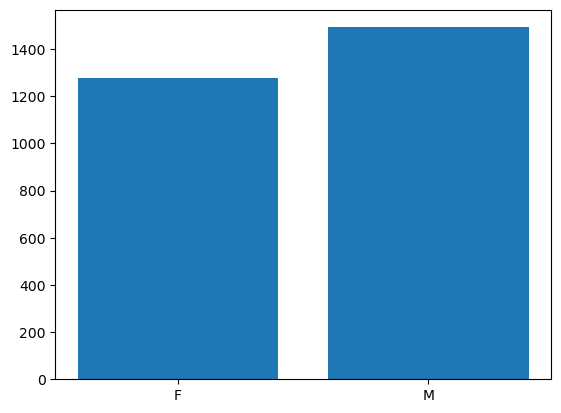

In [28]:
fc = df2.get_group('F').count() #acessa pelo rótulo da coluna
mc = df2.get_group('M').count()
print(fc[0])
print(mc[0])
import matplotlib.pyplot as plt
plt.bar(['F', 'M'], [fc[0], mc[0]])

Gender balance professores@UFRN:

In [29]:
fgb = fc[0]/(fc[0]+mc[0])*100
mgb = mc[0]/(fc[0]+mc[0])*100
print('F: ' + str(fgb) + ' %')
print('M: ' + str(mgb) + ' %')

F: 46.13718411552347 %
M: 53.86281588447653 %


In [30]:
df3 = df.groupby('lotacao')
df3.ngroups

135

In [31]:
df3.get_group('ESCOLA AGRÍCOLA DE JUNDIAÍ').count()

siape                    120
sexo                     120
formacao                 120
tipo_jornada_trabalho    120
vinculo                  120
categoria                120
classe_funcional         120
id_unidade_lotacao       120
lotacao                  120
admissao                 120
dtype: int64

## 1 - Exiba as colunas lotacao e o valor total de docentes em cada lotacao, ordenados do maior para o menor

In [35]:
# por padrão value_counts já retorna a lista de frequências em ordem descendente
n_docentes_lotacao = df['lotacao'].value_counts()
# como a exibição por default é truncada, pode-se controlar o número a exibir
pd.set_option('display.max_rows', 140)
n_docentes_lotacao
# mais opções em https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html

ESCOLA AGRÍCOLA DE JUNDIAÍ                                              120
FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA                       107
ESCOLA DE CIÊNCIAS E TECNOLOGIA                                         104
ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE             75
DEPARTAMENTO DE ODONTOLOGIA                                              73
ESCOLA DE MÚSICA                                                         70
DEPARTAMENTO DE LETRAS                                                   57
INSTITUTO METROPOLE DIGITAL                                              56
FACULDADE DE ENGENHARIA, LETRAS E CIÊNCIAS SOCIAIS DO SERIDÓ - FELCS     56
INSTITUTO DE QUÍMICA                                                     55
NÚCLEO DE EDUCAÇÃO DA INFÂNCIA                                           52
DEPARTAMENTO DE PRÁTICAS EDUCACIONAIS E CURRÍCULO                        50
DEPARTAMENTO DE FUNDAMENTOS E POLÍTICAS DA EDUCAÇÃO                      50
DEPARTAMENTO

## 2 - Exiba o gender balance em cada unidade de lotacao

In [33]:
df3.ngroups

135

In [38]:
#df3 = df.groupby('lotacao').agg(lambda x: ','.join(x)) # transforma DataFrameGroupBy em DataFrame
# outra opção é pelo get_group...
#print(df3)

# Lista de índeces, ou seja, de lotações (string)
for index_row in (n_docentes_lotacao.index): 
    filterF = df['sexo'] == 'F' 
    filterV = df['vinculo'] == 'Ativo Permanente'
    
    df4 = df[df['lotacao']==index_row].where(filterF & filterV)
    # celulas que não atendem, where retorna NaN, então vamos excluir estas linhas
    df4.dropna(how='all', inplace=True)
    f = df4.shape[0]
    
    filterM = df['sexo'] == 'M' & df['vinculo'] == 'Ativo Permanente'
    df5 = df[df['lotacao']==index_row].where(filterM & filterV)  
    df5.dropna(how='all', inplace=True)
    m = df5.shape[0]
    
    print('Gender balance na Lotação: ' + index_row)
    print('----------------------------------------')
    print(f'F (%): {(f/(f+m))*100:.2f}')
    print(f'M (%): {(m/(f+m))*100:.2f}')
    print('sendo: ' + str(f) + ' professoras e ' + str(m) + ' professores')
    print('----------------------------------------\n')
    
        
    

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]